# 12 Makia包作图

## 12.1 样例数据

In [ ]:
using DataFrames, DataFramesMeta, CSV
using CategoricalArrays
dclass = CSV.read("data/class19.csv", DataFrame)
transform!(dclass,
    :sex => (s -> categorical(s)),
    renamecols = false)
transform!(dclass, :sex => (x -> levelcode.(x)) => :sexi,
    :age => categorical => :agec)

In [ ]:
using Downloads
urlf = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
dht = CSV.read(Downloads.download(urlf), DataFrame,
    header=0)
rename!(dht, ["age", "sex", "cp", "trestbps", "chol", 
    "fbs", "restecg", "thalach", "exang", "oldpeak",    
    "slope", "ca", "thal", "num"])
print(first(dht,5))

## 12.2 简单一次性完成的图形

In [ ]:
using DataFrames
using CairoMakie
CairoMakie.activate!()
# 折线图
da0 = copy(dclass)
sort!(da0,:height)
lines(da0[:,:height], da0[:,:weight])

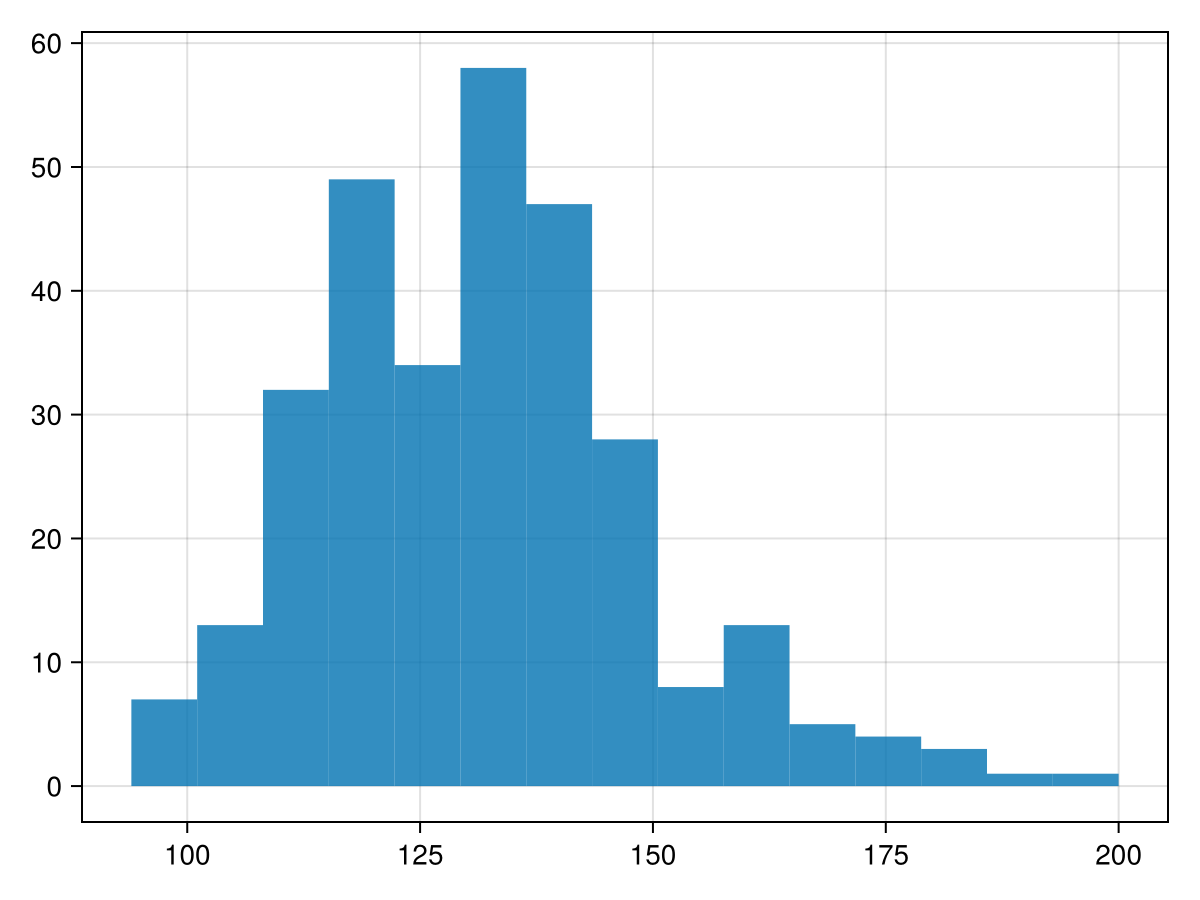

In [13]:
# 直方图
hist(da0[:,:height], bins = 6)
hist(dht[:,:trestbps], bins=15)

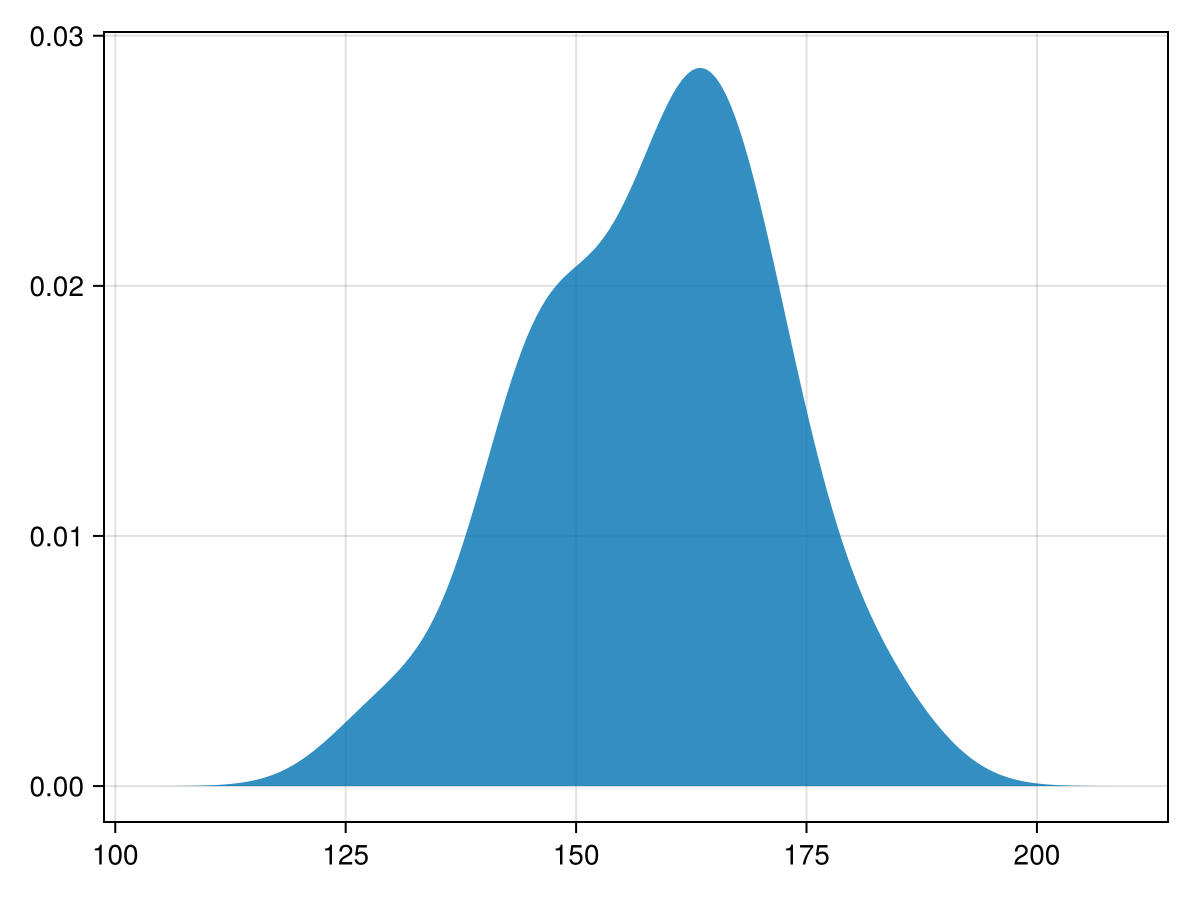

In [14]:
# 密度估计曲线图
density(dclass[:, :height])

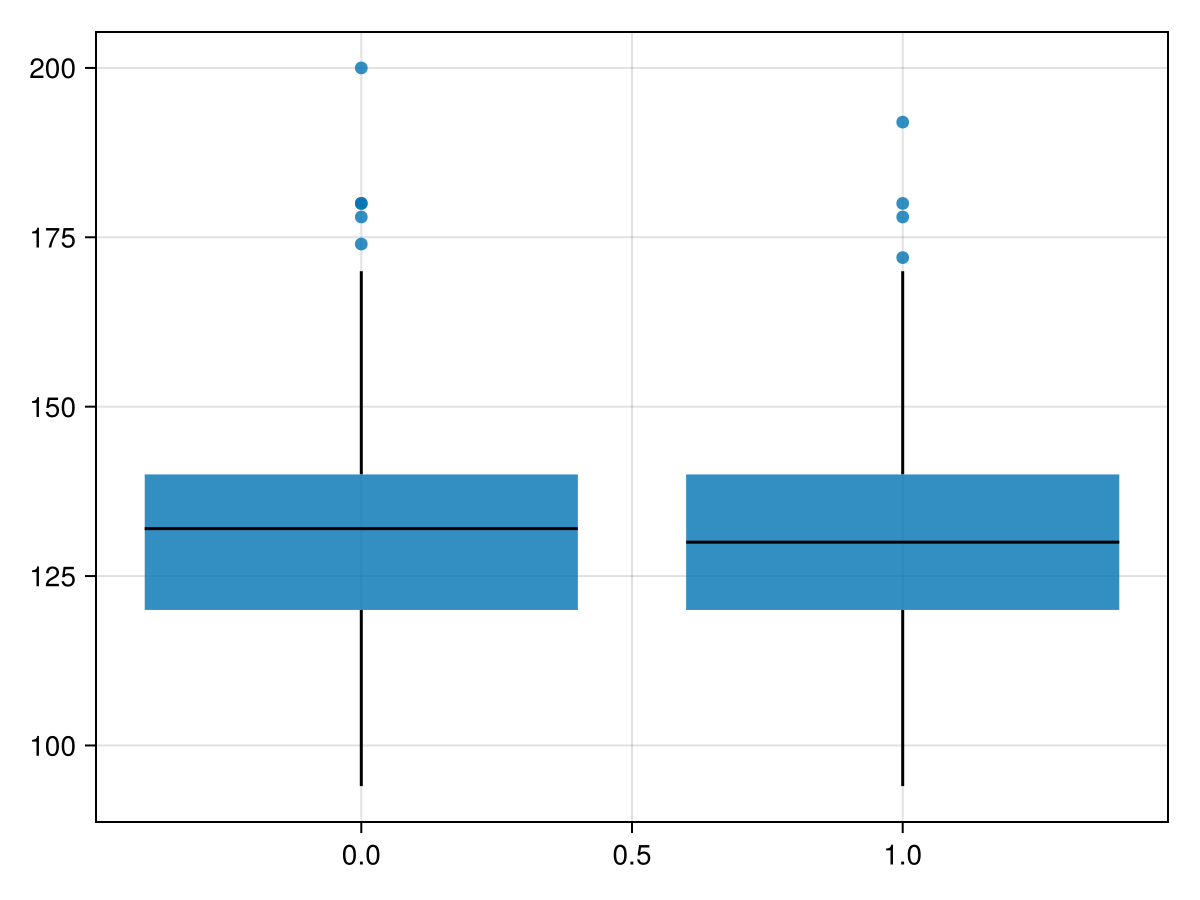

In [16]:
# 盒形图
boxplot(dht[:, :sex], dht[:, :trestbps])

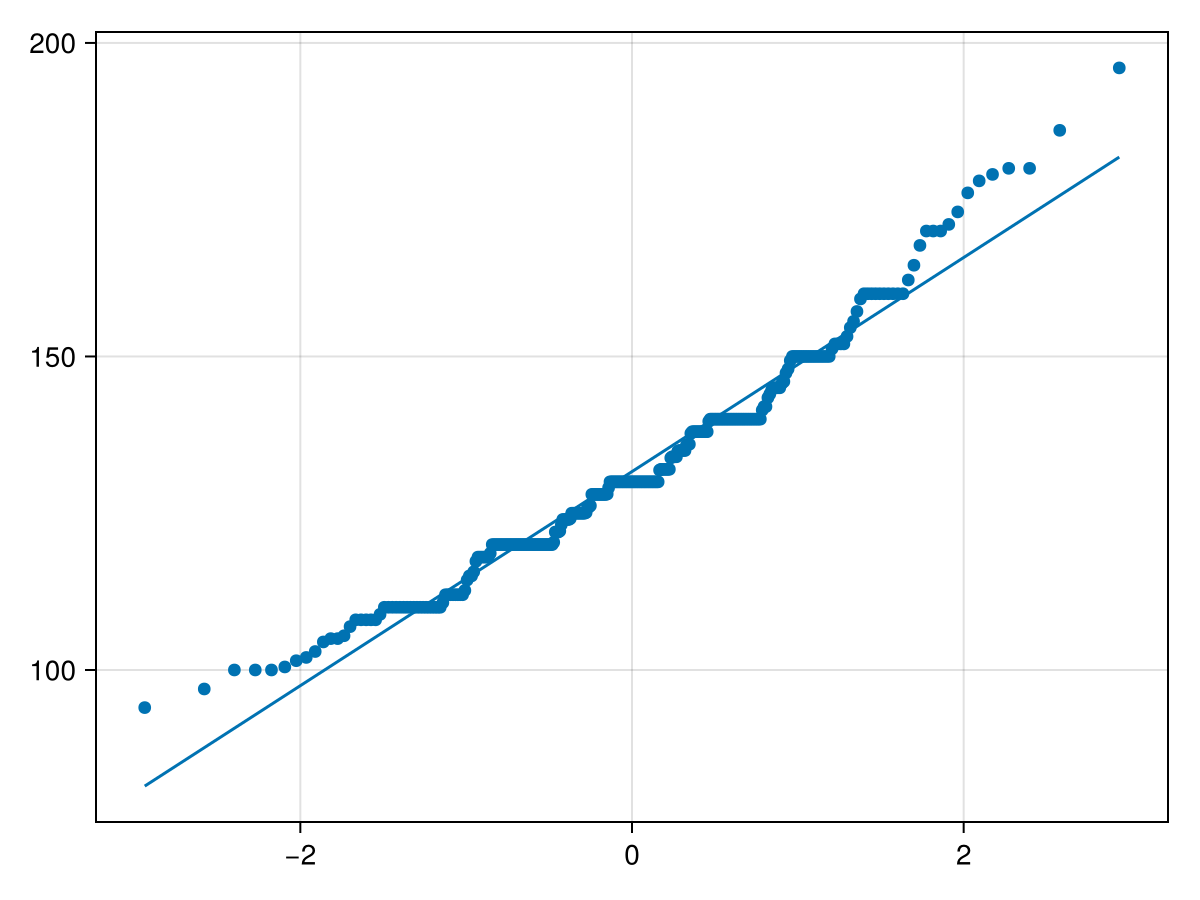

In [17]:
# 正态QQ图
# 正态QQ图用来检查输入的变量是否来自正态分布总体， 如果散点与直线比较接近， 则可以认为符合。 
# 如果散点的走向与直线明显偏离， 则认为非正态分布。
qqnorm(dht[:, :trestbps], qqline=:fit)

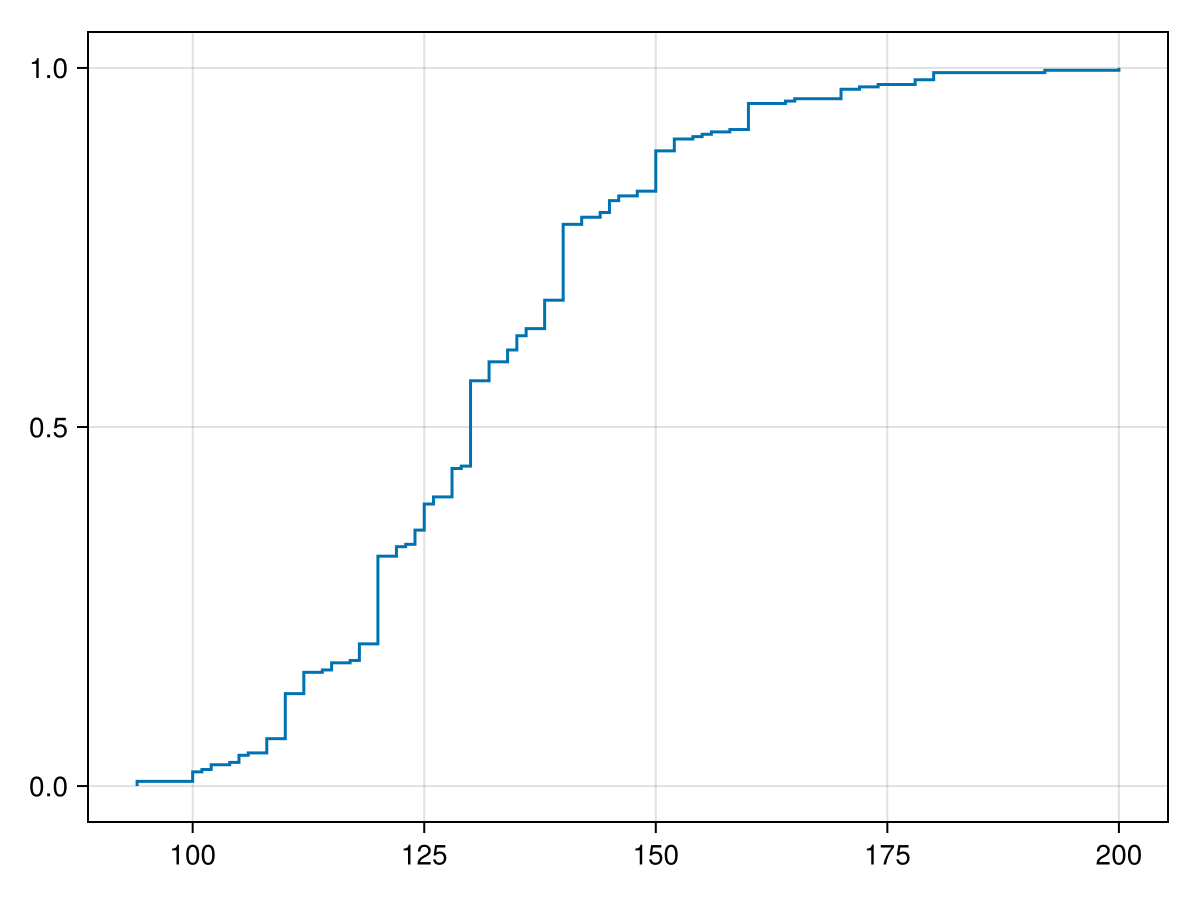

In [18]:
# 经验分布函数图
ecdfplot(dht[:, :trestbps])

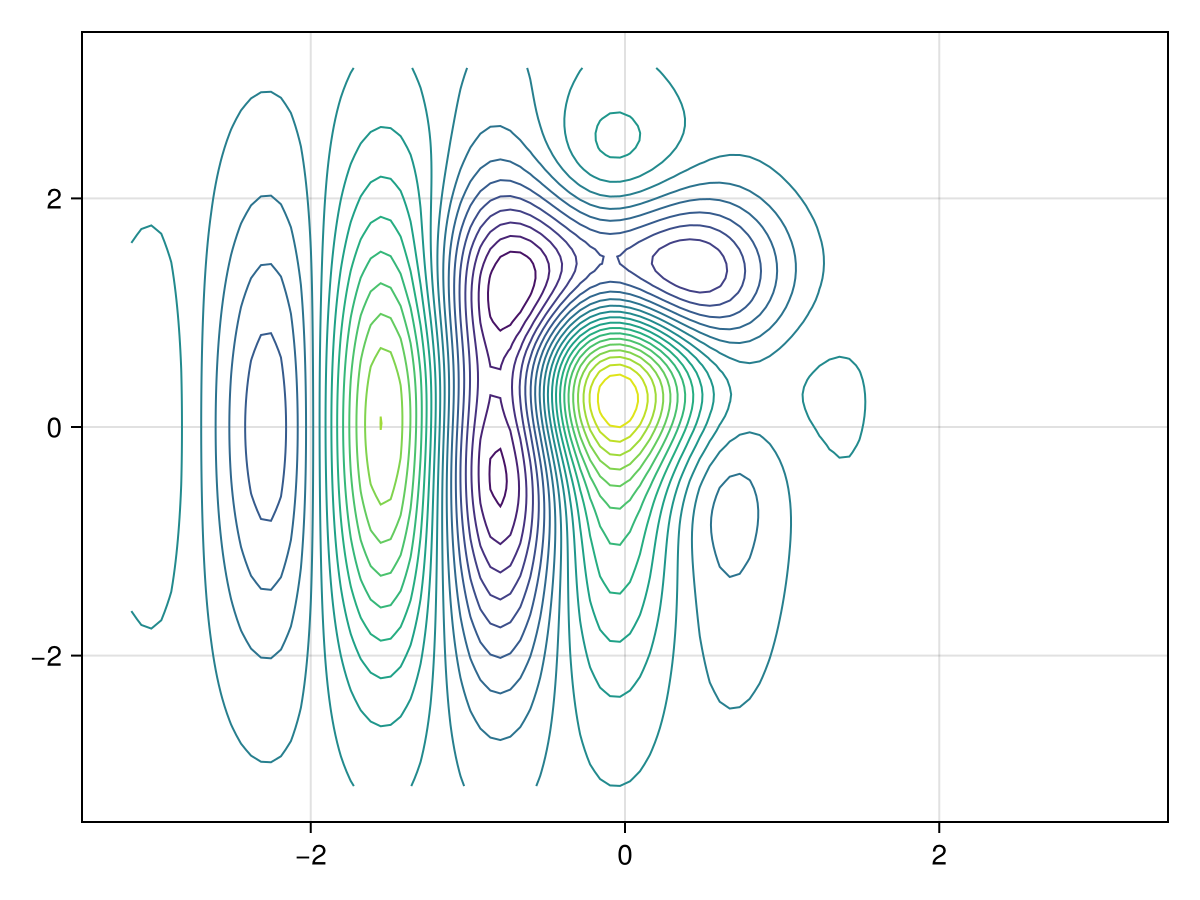

In [19]:
# 曲面的等高线图
function surfd()
    n = 100
    xs = range(-pi, pi, n)
    ys = range(-pi, pi, n)
    z = [exp(-0.5*((x + 1)^2 + 0.5*y^2))*cos(4*x) +
        exp(-0.8*(2*x^2 + (y-1)^2))*cos(2*y)
        for x in xs, y in ys]
    return (xs, ys, z)
end
x, y, z = surfd()

contour(x, y, z, levels=20)

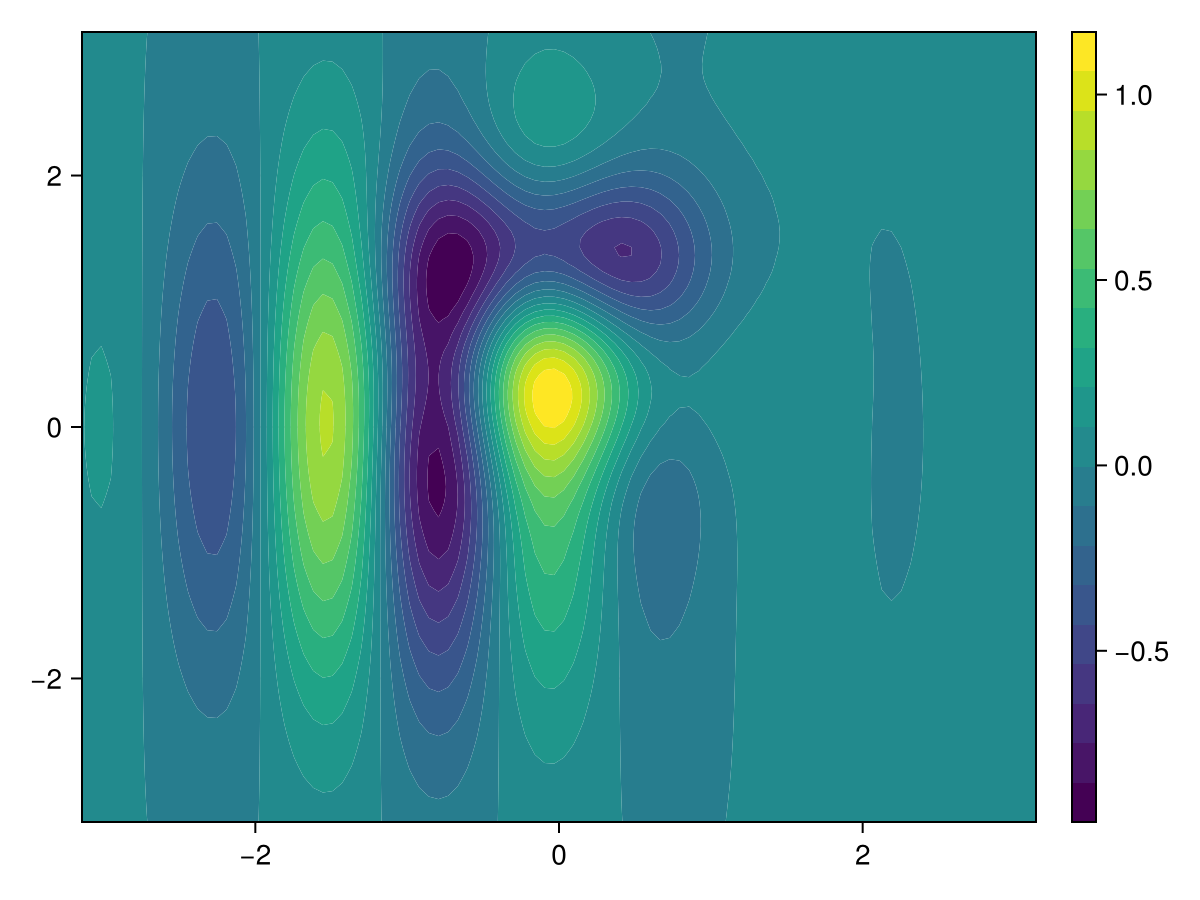

In [20]:
# 曲面的染色等高线图
x, y, z = surfd()
fig, ax, plt = contourf(x, y, z, levels=20)
Colorbar(fig[1,2], plt)
fig

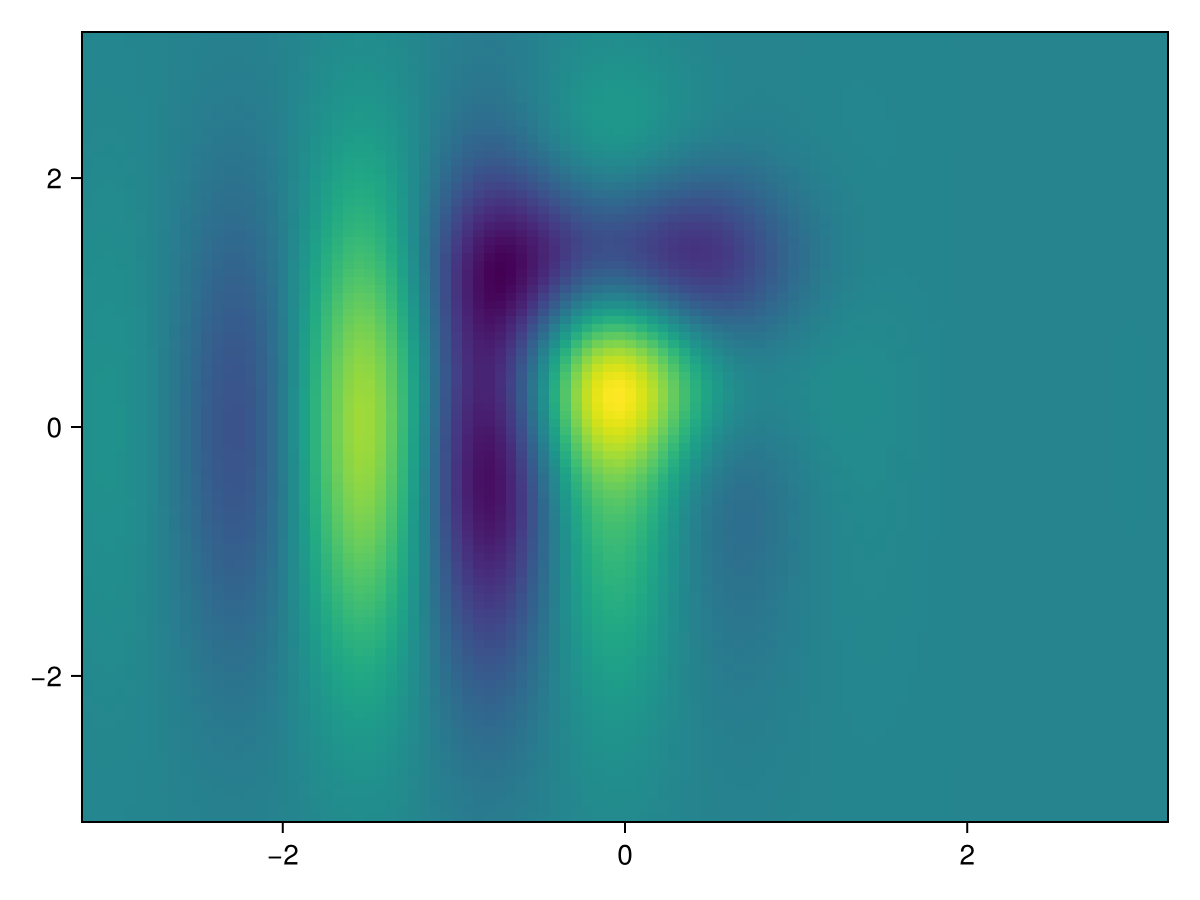

In [21]:
# 曲面的热力图
x, y, z = surfd()
heatmap(x, y, z)